In [1]:
import pandas
import numpy as np
from ipywidgets import *
import sqlalchemy 

In [2]:
groupdata = "Group Level Data.xlsx"
disk_engine = sqlalchemy.create_engine('sqlite:///myStatusDB.db')

In [3]:
all_ = pandas.read_excel(groupdata,encoding='utf-8')
group_pd = all_.loc[:,'Status':'Choice'] 
group_pd = group_pd.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x) ))
group_pd['Demographic'] = all_.Group

[str(c) for c in  group_pd.columns.values]

['Status', 'Ideology', 'Conventionalism', 'Choice', 'Demographic']

In [4]:
# Load table to SQL

def try_load():
    try:
        pandas.read_sql_query('''DROP TABLE StaIdeConv''',  disk_engine)
    
    except Exception as  e:
#         print type(e), e
        pass
    try:
        group_pd.to_sql('StaIdeConv', disk_engine)
    except Exception as  e:
#         print type(e), e
        pass
        
try_load()


In [5]:
S = pandas.read_sql_query('''
SELECT ROUND(Status,2) as 'Status', Demographic FROM StaIdeConv
ORDER BY Status Desc

''',  disk_engine)

S


,Status,Demographic
0,0.54,Rich People
1,0.43,Big Business
2,0.26,Whites
3,0.19,The Military
4,0.16,Conservatives
5,0.15,Asian-Americans
6,0.14,Christians
7,0.12,Catholics
8,0.10,Middle Class People
9,0.04,Liberals


In [6]:

C = pandas.read_sql_query('''
SELECT ROUND(Choice,2) as 'Choice', Demographic FROM StaIdeConv
ORDER BY Choice Desc

''',  disk_engine)
C




,Choice,Demographic
0,0.34,Conservatives
1,0.34,Tea Party
2,0.33,Liberals
3,0.33,Christians
4,0.32,Atheists
5,0.30,Christian Fundamentalists
6,0.29,Feminists
7,0.29,The Military
8,0.28,Catholics
9,0.21,Big Business


In [7]:
SC = pandas.read_sql_query('''
SELECT Status, Ideology, Conventionalism, Choice, Demographic FROM StaIdeConv
ORDER BY Demographic Asc

''',  disk_engine)

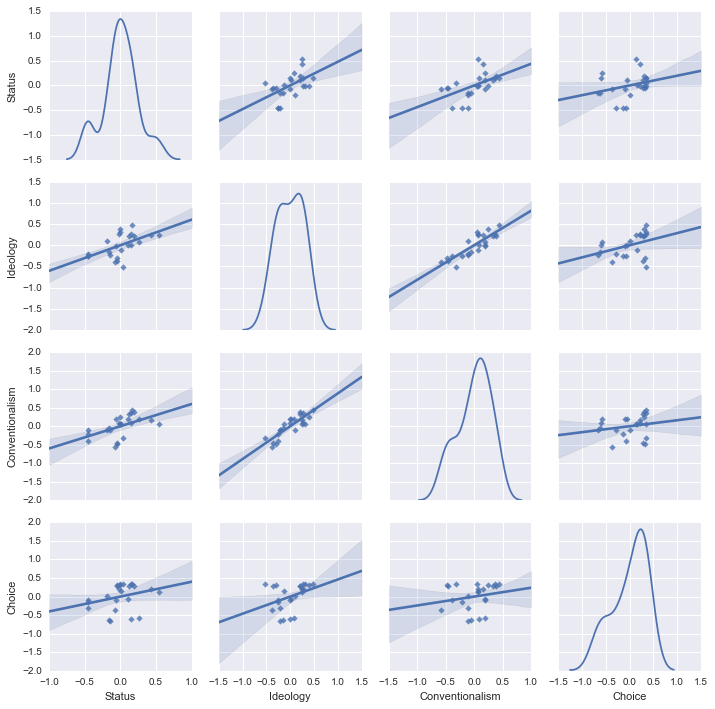

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
scatter_matrix = sns.pairplot(SC,  markers='D', palette= 'husl', kind = 'reg',diag_kind='kde')




In [11]:
D3 = pandas.read_sql_query('''
SELECT * FROM StaIdeConv
ORDER BY Demographic Asc

''',  disk_engine)

In [14]:
import plotly.plotly as py

py.plotly.tools.set_credentials_file(username='zestela', api_key='zbvqdfpjh3')
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

a = D3.Status

# Create a trace
trace = go.Scatter3d(
    x = D3.Ideology,
    y = D3.Choice,
    z = D3.Conventionalism,
    mode = 'markers',
    text = D3.Demographic,
    marker=dict(
        size=12,
        color=a,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8)
    
)



layout=go.Layout(width=800, height=800, title = 'Status',
              scene = dict(xaxis=dict(title='Ideology',
                                      titlefont=dict(color='rgb(220, 220, 220)')),
                            yaxis=dict(title='Choice',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            zaxis=dict(title='Conventionalism',
                                       titlefont=dict(color='rgb(220, 220, 220)')),
                            bgcolor = 'rgb(20, 24, 54)'
                           )
             )


data = [trace]
fig=dict(data=data, layout=layout)






# Plot and embed in ipython notebook!
py.iplot(fig, filename='simple-3d-scatter')


In [ ]:
Gr = [g for g in group_pd['Demographic'] ]
a = SelectMultiple(
    width = 900,
    description="You",
    options= Gr
    
)
a

df = group_pd[group_pd['Demographic'].isin(a.value)]


In [ ]:
df

In [ ]:
def denorm(n):
    return round( n.mean()*100,1)


In [ ]:
selection =  { 'Groups': [', '.join([str(i) for (i) in a.value])],
              'Status': [denorm(df.Status)], 
              'Ideology': [denorm(df.Ideology)], 
              'Conventionalism':[denorm(df.Conventionalism)], 
              'Choice':[denorm(df.Choice)]}
myDemographics = pandas.DataFrame.from_dict(selection)

sortCols = ['Groups'] + [k for k in selection.keys() if k != 'Groups']

myDemographics = myDemographics.reindex(columns=[sortCols])
myDemographics